In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn.csv')

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [8]:
df['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

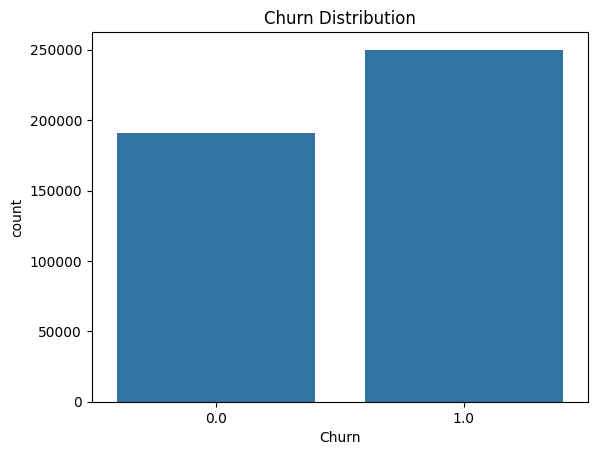

In [14]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

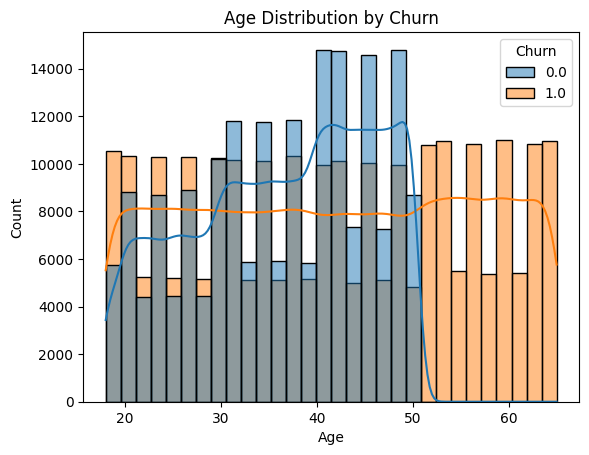

In [15]:
sns.histplot(data=df, x='Age', hue='Churn', kde=True, bins=30)
plt.title('Age Distribution by Churn')
plt.show()


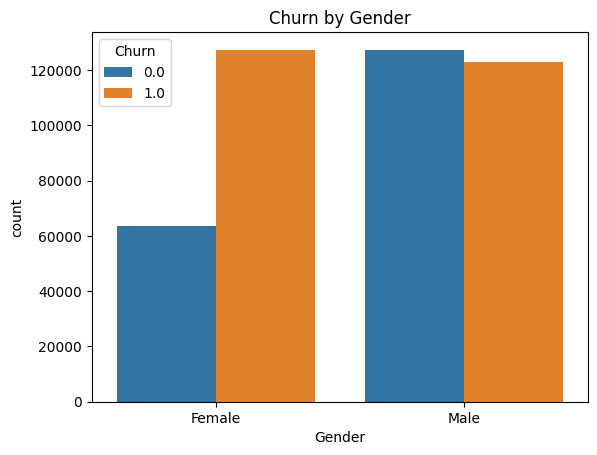

In [16]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()


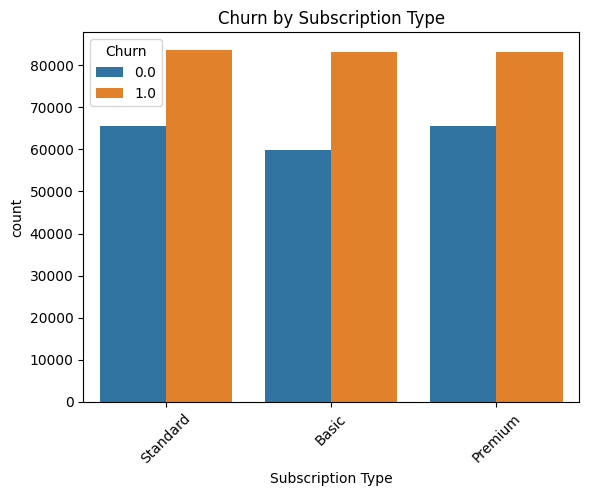

In [17]:
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title('Churn by Subscription Type')
plt.xticks(rotation=45)
plt.show()


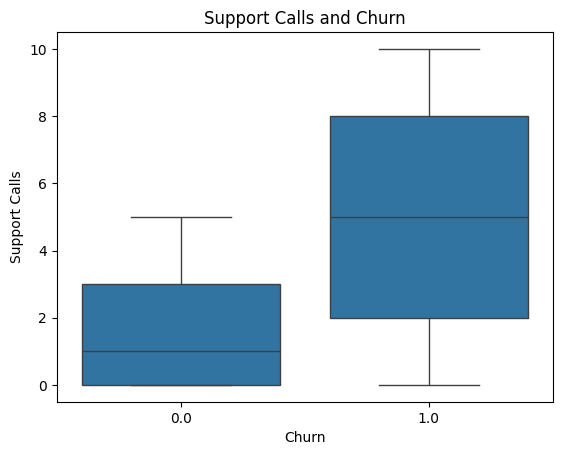

In [18]:
sns.boxplot(x='Churn', y='Support Calls', data=df)
plt.title('Support Calls and Churn')
plt.show()


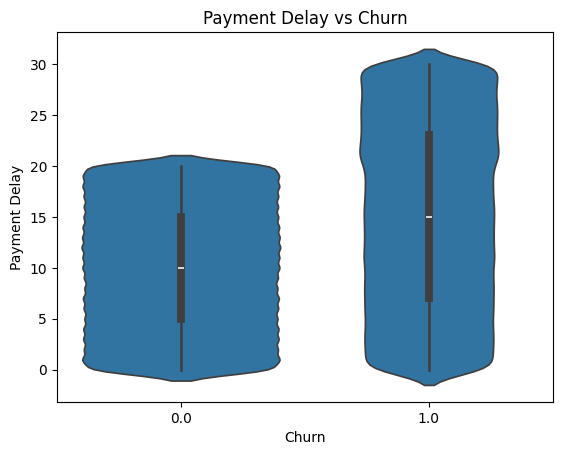

In [19]:
sns.violinplot(x='Churn', y='Payment Delay', data=df)
plt.title('Payment Delay vs Churn')
plt.show()


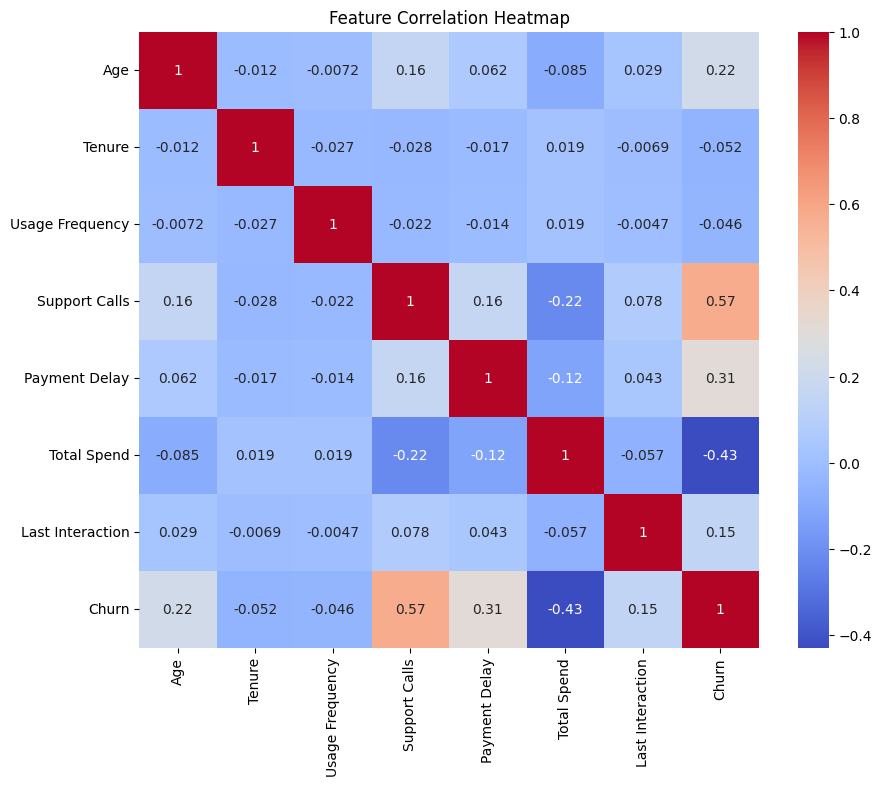

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [21]:
df = df.drop('CustomerID', axis=1)


In [24]:
selected_features = ['Age', 'Tenure', 'Usage Frequency', 'Total Spend', 'Churn']
sns.pairplot(df[selected_features], hue='Churn')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D7D2529240> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

C:\Users\vinay\AppData\Local\Temp\ipykernel_112772\3595342707.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_agegroup = df.groupby('AgeGroup')['Churn'].mean().reset_index()


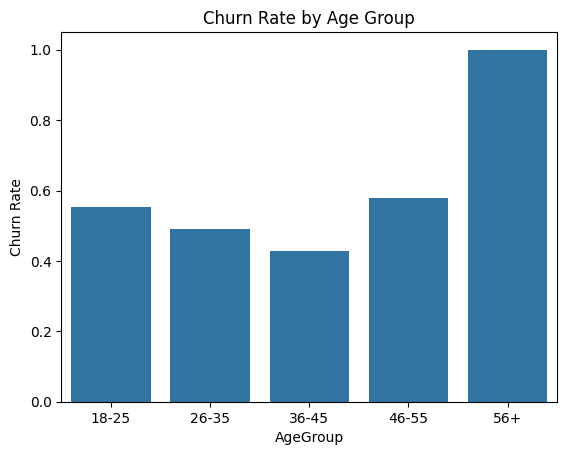

In [25]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 70], 
                        labels=['18-25', '26-35', '36-45', '46-55', '56+'])

churn_by_agegroup = df.groupby('AgeGroup')['Churn'].mean().reset_index()

sns.barplot(data=churn_by_agegroup, x='AgeGroup', y='Churn')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.show()

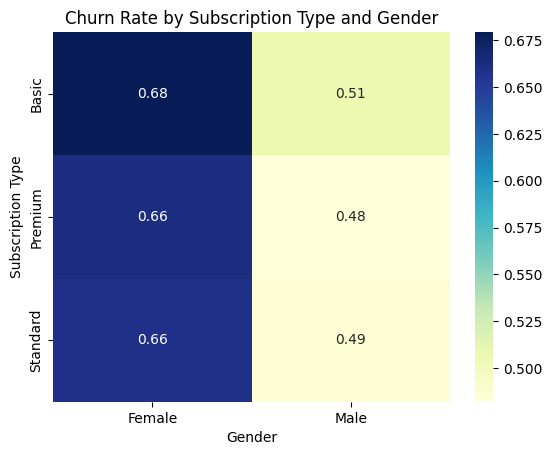

In [26]:
pivot = pd.pivot_table(df, values='Churn', 
                       index='Subscription Type', 
                       columns='Gender', aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Churn Rate by Subscription Type and Gender')
plt.show()

In [33]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 680732692896060896
xla_global_id: -1
]
